# Computation Problem: Numerical Differentiation
## Jincheng(Eric) Huang

In [1]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt

## Problem 1

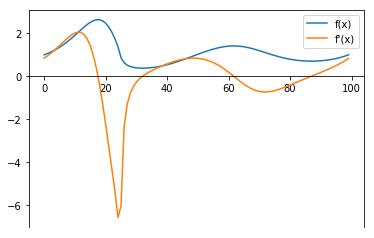

In [2]:
x = sy.symbols('x')
eq = (sy.sin(x)+1)**(sy.sin(sy.cos(x)))      # the expression of f(x)
f = sy.lambdify(x, eq, 'numpy')              # lambdify f(x)
fp = sy.lambdify(x, sy.diff(eq,x),'numpy')   # lambdify f'(x)

xgrid = np.linspace(-np.pi, np.pi, num=100)

# figure
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(f(xgrid), label='f(x)')
plt.plot(fp(xgrid), label='f\'(x)')
plt.legend()
plt.show()

## Problem 2

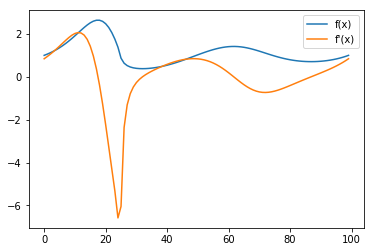

In [3]:
h = max(np.max(np.abs(xgrid)),1)*np.sqrt(np.finfo(float).eps)

def forward_order1(f, x, h):
    return (f(x+h) - f(x)) / h

def forward_order2(f, x, h):
    return (-3*f(x) + 4*f(x+h) - f(x+2*h)) / (2*h)

def backward_order1(f, x, h):
    return (f(x) - f(x-h)) / h

def backward_order2(f, x, h):
    return (3*f(x) - 4*f(x-h) + f(x-2*h)) / (2*h)

def centered_order2(f, x, h):
    return (f(x+h) - f(x-h)) / (2*h)

def centered_order4(f, x, h):
    return ((f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h)) / (12*h))

# forward order 1
plt.plot(f(xgrid), label='f(x)')
plt.plot(forward_order1(f,xgrid,h), label='f\'(x)')
plt.legend()
plt.show()

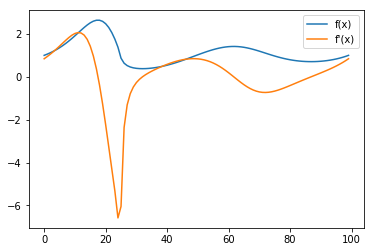

In [4]:
# forward order 2
plt.plot(f(xgrid), label='f(x)')
plt.plot(forward_order2(f,xgrid,h), label='f\'(x)')
plt.legend()
plt.show()

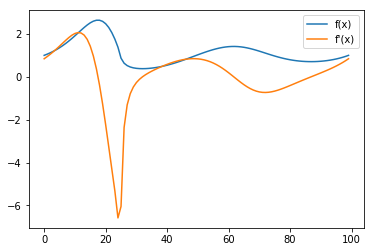

In [5]:
# backward order 1
plt.plot(f(xgrid), label='f(x)')
plt.plot(backward_order1(f,xgrid,h), label='f\'(x)')
plt.legend()
plt.show()

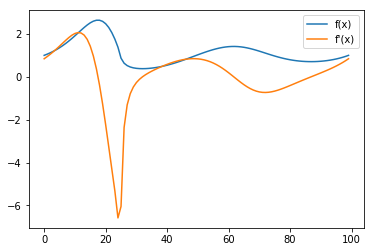

In [6]:
# backward order 2
plt.plot(f(xgrid), label='f(x)')
plt.plot(forward_order2(f,xgrid,h), label='f\'(x)')
plt.legend()
plt.show()

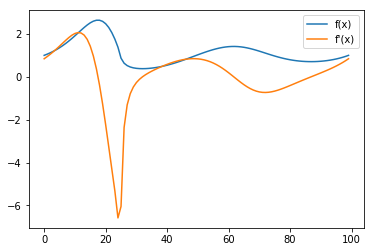

In [7]:
# centered order 2
plt.plot(f(xgrid), label='f(x)')
plt.plot(centered_order2(f,xgrid,h), label='f\'(x)')
plt.legend()
plt.show()

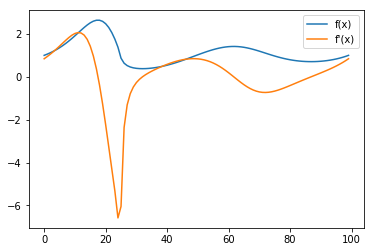

In [8]:
# centered order 4
plt.plot(f(xgrid), label='f(x)')
plt.plot(centered_order4(f,xgrid,h), label='f\'(x)')
plt.legend()
plt.show()

## Problem 3

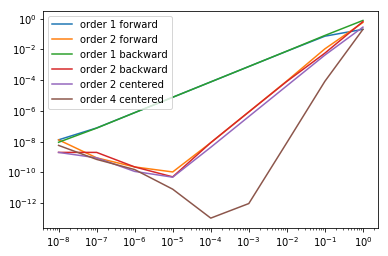

In [9]:
x0 = 1
hgrid = np.logspace(-8,0,9)

o1f_err = np.abs(fp(x0) - forward_order1(f, x0, hgrid))
o2f_err = np.abs(fp(x0) - forward_order2(f, x0, hgrid))
o1b_err = np.abs(fp(x0) - backward_order1(f, x0, hgrid))
o2b_err = np.abs(fp(x0) - backward_order2(f, x0, hgrid))
o2c_err = np.abs(fp(x0) - centered_order2(f, x0, hgrid))
o4c_err = np.abs(fp(x0) - centered_order4(f, x0, hgrid))

plt.loglog(hgrid, o1f_err, label="order 1 forward")
plt.loglog(hgrid, o2f_err, label="order 2 forward")
plt.loglog(hgrid, o1b_err, label="order 1 backward")
plt.loglog(hgrid, o2b_err, label="order 2 backward")
plt.loglog(hgrid, o2c_err, label="order 2 centered")
plt.loglog(hgrid, o4c_err, label="order 4 centered")
plt.legend()
plt.show()


## Problem 5

In [10]:
x = sy.symbols('x')
y = sy.symbols('y')

eq_F = sy.Matrix(([x**2, x**3-y]))
F = sy.lambdify((x,y),eq_F)

eq_J = eq_F.jacobian((x,y))
J = sy.lambdify((x,y),eq_J)

def func(f, x, h):
    j = f(*sy.flatten(x)).shape[0]
    ret_jacobian = np.empty([j, len(x)])
    for i in range(1,j+1):
        temp_e = np.eye(1,j,i-1)
        temp_arg1 = np.array((x + h*temp_e)).flatten()
        temp_arg2 = np.array((x - h*temp_e)).flatten()
        ret_jacobian[i-1] = ((f(*sy.flatten(temp_arg1)) - f(*sy.flatten(temp_arg2)))/(2*h)).flatten()
    return ret_jacobian.T

print("Jacobian(the analytical result)")
print(J(1,1))

print("Jacobian(the approximated result:")
print(func(F, np.array((1,1)), h))

Jacobian(the analytical result)
[[ 2  0]
 [ 3 -1]]
Jacobian(the approximated result:
[[ 2.  0.]
 [ 3. -1.]]


## Problem 6

In [11]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


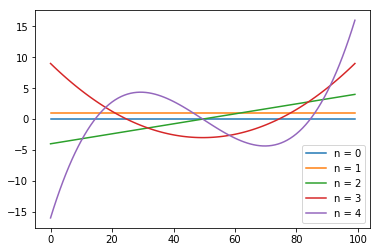

In [12]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

def chebyshev_polynomials(x,n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2*x*chebyshev_polynomials(x,n-1) - chebyshev_polynomials(x,n-2)
    
xgrid = anp.linspace(-1,1,100)
d_cheb = elementwise_grad(chebyshev_polynomials)

for i in range(5):
    plt.plot(d_cheb(xgrid,i), label = "n = " + str(i))
plt.legend()
plt.show()